#### Tesseract is a general purpose OCR engine, but it works best when we have clean black text on solid white background in a common font. It also works well when the text is approximately horizontal and the text height is at least 20 pixels.

##### If the text has a surrounding border, it may be detected as some random text. However, if we help Tesseract a bit by cropping out the text region, it gives perfect output.

### Import all the required libraries

In [1]:
# OpenCV
import cv2
import numpy as np
import pytesseract
from PIL import Image, ImageEnhance, ImageFilter
from pytesseract import image_to_string
import matplotlib.pyplot as plt

# Sentiment Analysis 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
src_path = ""

In [3]:
# Define config parameters.
# '-l eng'  for using the English language
# '--oem 1' for using LSTM OCR Engine
config = ('-l eng --oem 1 --psm 3')

### OpenCV and Tesseract to extract text from Image

In [6]:
def get_string(img_path):
    # Read image with opencv
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    # In case openCV does not support 'jpg' : sudo apt-get install libjpeg-dev
    #cv2.imshow("", img) 
    plt.imshow(img, cmap = 'gray', interpolation = 'bicubic') # Can do it either way
    plt.show()
    #img = plt.imread('img1.jpg') # uses matplotlib : They both load into 3-channel uint8 numpy arrays. 
    
    # Convert to gray
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply dilation and erosion to remove some noise
    kernel = np.ones((1, 1), np.uint8)
    img = cv2.dilate(img, kernel, iterations=1)
    img = cv2.erode(img, kernel, iterations=1)

    # Write image after removed noise
    cv2.imwrite(src_path + "removed_noise.png", img)

    #  Apply threshold to get image with only black and white
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2)

    # Write the image after apply opencv to do some ...
    cv2.imwrite(src_path + "thres.png", img)

    # Recognize text with tesseract for python
    result = pytesseract.image_to_string(Image.open(src_path + "thres.png"), config=config)

    # Remove template file
    #os.remove(temp)

    return result

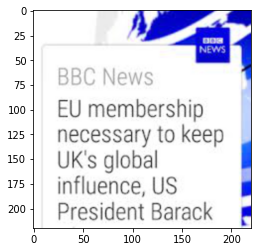

BBC News 1
EU membership 
necessary to keep
UK's global I
influence, US
Pyesident Barack g


In [16]:
str = get_string(src_path + "img3.jpg") # Uses pytessearact BUT it fails in cases with noisy backgroud or even in certain lighting conditions
print(str)

### Sentiment Analysis on the headlines

VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. VADER uses a combination of A sentiment lexicon is a list of lexical features (e.g., words) which are generally labelled according to their semantic orientation as either positive or negative.

VADER has been found to be quite successful when dealing with social media texts, NY Times editorials, movie reviews, and product reviews. This is because VADER not only tells about the Positivity and Negativity score but also tells us about how positive or negative a sentiment is.

In [17]:
analyser = SentimentIntensityAnalyzer()
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence,score))

In [18]:
sentiment_analyzer_scores(str)

BBC News 1
EU membership 
necessary to keep
UK's global I
influence, US
Pyesident Barack g {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
